# Notes

ANN -> Artificial Neural Network (Models used in deep learning are called as ANN).
ANN are computing systems that are inspired by the brain's neural network.
These networks are based on collection of connected units called neurons which transmit and receive signals from each other.
Neurons are organized in layers.
- Input Layer
- Hidden Layer
- Output Layer
(Neurons are basically some functions which perform calculations)

____________________________________________________________________

To Build an ANN we can use Neural Network API called as Keras.
In Keras we can build sequential model. Keras defines this sequential models as a linear stack of layers. (Neurons are also organized in layers)

Dense -> Type of layer
Dense(No. of neurons, Shape of data we are passing into our model, activation funtion) 

____________________________________________________________________

Layers in an ANN:-
- Dense (or fully connected) layers
- Convolution Layers (can be used where model is with image data) 
- Pooling Layers
- Recurrent Layers (can be used where model is with time series data) 
- Normalization Layers
- Others....

______________________________________________________________________

CNN -> Convolution Neural Network
It is an ANN popularly used for analyzing images. They can also be used for other data analysis or classificatin problems.
It picks out patterns and makes sense out of them making it is usefull in image analysis. 
CNN have convolutional layers (CL) which receives input, transforms it in someway and then outputs it. CL have filters which detect patterns like edges, shapes, objects, etc.

_______________________________________________________________________

[1]
Pre-req: 
What a tensor is?
-> Tensors are simply mathematical objects that can be used to describe physical properties, just like scalars and vectors. (Imagine a Matirx)

What is overfitting?
-> Overfitting happens when your model fits too well to the training set.  For example, your model recognizes specific images in your training set instead of general patterns.

---------------
keras.layers:-
Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function.

Dense (Core Layer)
Input (Core Layer)
Dropout (Helps to randomly sets input units to 0 at each step during training time, which helps prevent overfitting.)
GlobalAveragePooling2D (Pooling layers basically helps in the reduction of overfitting by the time of training of the model by compressing or generalizing the features)
Flatten (Flattening is converting the data into a 1-dimensional array for inputting it to the next layer)
Conv2D (2D convolution layer)
BatchNormalization (Layer that normalizes its inputs)
Activation (Core layer)
MaxPooling2D 

keras.models:-
3 ways to Create Keras Models -> One of them is: Sequential Model
-> The Sequential model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers.

keras.optimizers:-
An optimizer is one of the two arguments required for compiling a Keras model.
Different optimizers -> Adam, SGD, RMSprop

# Dataset

https://www.kaggle.com/msambare/fer2013
By Google, available on Kaggle. Ian Goodfellow is the author.

# Importing Libraries

In [1]:
# Importing libraries for data exploration and Visualization.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# To access system files.
import os

# Importing Deep Learning Libraries

# To load images and convert image to array -> to fit into the model easily (Model will not take image, it will only take array form)
from keras.preprocessing.image import load_img, img_to_array

# 
from keras.preprocessing.image import ImageDataGenerator

# Importing Important layers:-
"""
Notes [1]
"""
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Images (Data Exploration)

In [4]:
# Standardizing the size of picture since all of them may not be of same size.
picture_size = 48


# Setting the folder_path to dataset of images
folder_path = "../../EMR 1/archive/"

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../../EMR 1/archive/train/happy'

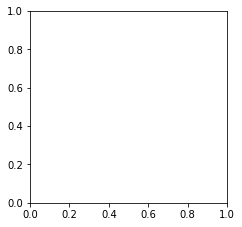

In [3]:
# Plotting images just for reference and exploration.
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Testing Data

In [9]:
# Batch Size depicts the number of training example models should take in one iteration.
batch_size  = 128

"""
ImageDataGenerator:-
So basically what happens is that instead of doing the hard (computation-intensive or memory-intensive) job as a whole, 
it breaks it down into batches and work on it as a batch. This way the parent function which invokes the child function 
does not have to wait until the parent function is done processing but can work on the go.

It is not feasible for large dataset to be loaded into the memory at once, if we create a data generator, 
we can read images on the go when they will be used for training. 

Keras provides a data generator for image datasets. The advantage of using ImageDataGenerator is that it will generate batches 
of data with augmentation.
"""

datagen_train  = ImageDataGenerator()
datagen_test = ImageDataGenerator()

# Data from the directory is taken into the ImageDataGenerator

"""
The flow_from_directory() method allows you to read the images directly from the directory and augment them
while the neural network model is learning on the training data.
Here, class_mode is categorical because we have different classes like anger, disgust, happy, sad, surprise, neutral.
"""
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_test.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Model Building

In [10]:
no_of_classes = 7

model = Sequential()

"""
Conv2D - This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
When using this layer as the first layer in a model, provide the keyword argument input_shape.
-> Arguments:
    - filters (64): Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
    - kernel_size (3,3): An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
    - padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. 
    - input_shape (shape,shape,img_type)
    
BatchNormalization - Layer that normalizes its inputs

Activation - It deicdes what data should be fired for the next layer.
'relu' -> Rectified Linear Unit, outputs positive orz ero
"""

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Collapse the input to 1D array which can be fed into the model easily.
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\prem\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Trainable params: 4,474,759
Non-trainable params: 3,968
_________________________________________________________________


# Fitting the Model with Training and Validation Data 

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

"""
A callback is an object that can perform actions at various stages of training.
ModelCheckpoint - Callback to save the Keras model or model weights at some frequency.
EarlyStopping - Stop training when a monitored metric has stopped improving.
 - monitor: Quantity to be monitored.
 - min_delta: Minimum change in the monitored quantity to qualify as an improvement
 - patience: Number of epochs with no improvement after which training will be stopped.
 - verbose: verbosity mode
 - restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity.
ReduceLROnPlateau - Reduce learning rate when a metric has stopped improving.
 - factor: factor by which the learning rate will be reduced.
 - min_delta: threshold for measuring the new optimum, to only focus on significant changes.
"""
# Checks and saves model
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 11

In [14]:
"""
generator : a generator whose output must be a list
steps_per_epoch : it specifies the total number of steps taken from the generator
 as soon as one epoch is finished and next epoch has started.
Epochs : an integer and number of epochs we want to train our model for.
"""
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-14-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/11
224/224 [==============================] - 700s 3s/step - loss: 1.4947 - accuracy: 0.4326 - val_loss: 1.3670 - val_accuracy: 0.4678 - lr: 0.0010
Epoch 2/11
224/224 [==============================] - 721s 3s/step - loss: 1.2848 - accuracy: 0.5042 - val_loss: 1.4844 - val_accuracy: 0.4713 - lr: 0.0010
Epoch 3/11
224/224 [==============================] - 818s 4s/step - loss: 1.1832 - accuracy: 0.5508 - val_loss: 1.3694 - val_accuracy: 0.4662 - lr: 0.0010
Epoch 4/11
224/224 [==============================] - 624s 3s/step - loss: 1.1127 - accuracy: 0.5788 - val_loss: 1.1877 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 5/11
224/224 [==============================] - 701s 3s/step - loss: 1.0622 - accuracy: 0.5972 - val_loss: 1.1616 - val_accuracy: 0.5675 - lr: 0.0010
Epoch 6/11
224/224 [==============================] - 681s 3s/step - loss: 1.0075 - accuracy: 0.6186 - val_loss: 1.3184 - val_accuracy: 0.4948 - lr: 0.0010
Epoch 7/11
224/224 [==============================] - 691s 3s/st

# Plotting Accuracy & Loss

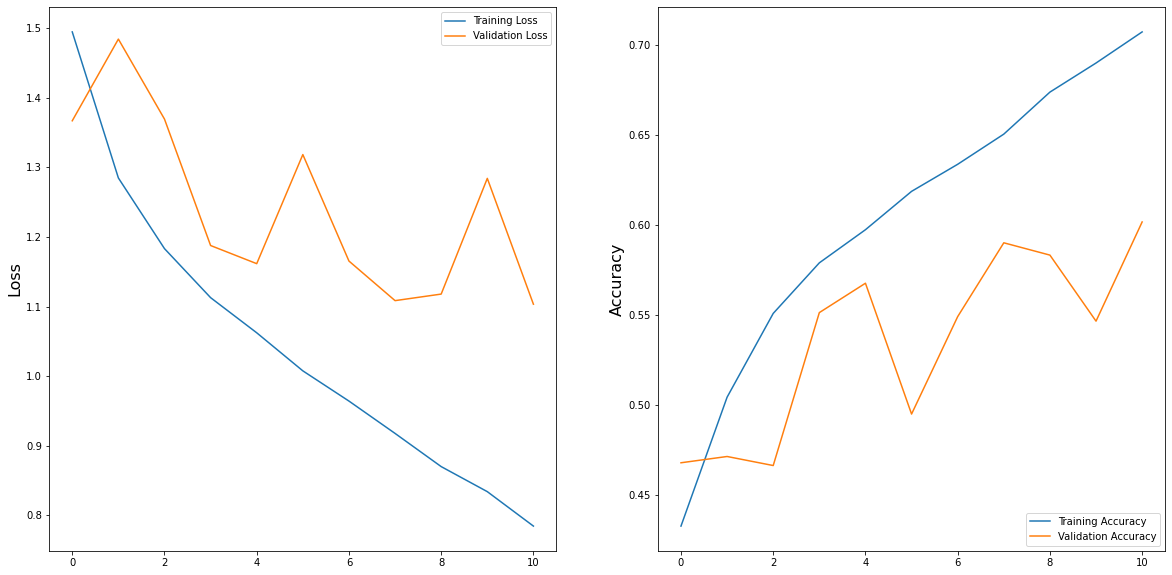

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)

plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()